# Clustering - Mini-Project 3

***Edit this cell with your name(s), tutorial number and ID(s)***

---

Name: Mariam ElMawardy

ID:59-30017

Tutorial:3

---

Name:Dana Salem

ID:58-4838

Tutorial:3

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 160.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/music_genres.csv')
df.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
4,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


**Data preprocessing:**

In [67]:
print("Dataset Shape:", df.shape)
# Shows how many rows and columns the dataset has.

print("\nData Types & Non-Null Counts:")
display(df.info())
# Displays each column's data type and how many missing values it has.

print("\nStatistical Summary:")
display(df.describe(include='all').T)
# Provides summary statistics for both numeric and categorical columns.

print("\nMissing Values Per Column:")
display(df.isnull().sum().sort_values(ascending=False))
# Lists how many missing values are in each column, sorted from most to least.

print("\nDuplicate Rows:", df.duplicated().sum())
# Counts how many duplicate rows exist in the dataset.

print("\nPreview cleaned data:")
df.head()
# Shows the first few rows of the dataset for a quick visual check.


Dataset Shape: (2972, 13)

Data Types & Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2972 non-null   object 
 1   acousticness      2972 non-null   float64
 2   danceability      2972 non-null   float64
 3   duration_ms       2972 non-null   float64
 4   energy            2972 non-null   float64
 5   instrumentalness  2972 non-null   float64
 6   liveness          2972 non-null   float64
 7   loudness          2972 non-null   float64
 8   speechiness       2972 non-null   float64
 9   tempo             2972 non-null   float64
 10  valence           2972 non-null   float64
 11  popularity        2972 non-null   float64
 12  key               2972 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 302.0+ KB


None


Statistical Summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
genres,2972,2972,zydeco,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,2972.0,NaN,NaN,NaN,0.401157,0.319781,0.000003,0.119036,0.321706,0.674088,0.996
danceability,2972.0,NaN,NaN,NaN,0.53719,0.150693,0.0569,0.441169,0.546511,0.647536,0.929
duration_ms,2972.0,NaN,NaN,NaN,251727.193751,94672.153684,30946.0,206367.384615,237547.875175,277300.839338,2382586.666667
energy,2972.0,NaN,NaN,NaN,0.56119,0.234511,0.001002,0.39503,0.601264,0.730202,0.994667
instrumentalness,2972.0,NaN,NaN,NaN,0.211368,0.267374,0.0,0.004829,0.080663,0.343333,0.992
liveness,2972.0,NaN,NaN,NaN,0.192791,0.09237,0.0222,0.137682,0.178752,0.220858,0.96
loudness,2972.0,NaN,NaN,NaN,-10.509249,5.370006,-41.825,-12.428814,-9.219409,-6.919969,0.06
speechiness,2972.0,NaN,NaN,NaN,0.08358,0.080495,0.0238,0.0449,0.059432,0.091,0.946219
tempo,2972.0,NaN,NaN,NaN,119.020796,17.471762,47.135722,109.191107,119.199333,127.510813,204.212



Missing Values Per Column:


,0
genres,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0
tempo,0



Duplicate Rows: 0

Preview cleaned data:


,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
4,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


The above code shows the entire initial dataset exploration that has to be performed to verify the dataset's cleanliness, consistency, and readiness for analysis. The first action is for printing the dataset shape which has revealed that the dataset is made of 2972 rows and 13 columns, So indicating that there are 2972 different music genres each with 13 musical attributes like acousticness, danceability, energy, tempo, and popularity, etc., described. The data types and the non-null report show that there are 2972 non-null values in all columns, which leads to the conclusion that there are no missing values in the dataset and all numerical features are appropriately stored as floats or integers, while “genres” is stored as an object (string), which is according to the expectation. The statistical summary has offered descriptive insights about the numerical attributes, for instance the mean energy level, the minimum and maximum popularity, and the distribution ranges of tempo, loudness, valence, and so forth. This is already the beginning of understanding the characteristics and the variability of the dataset prior to applying the model. The missing-value check indicates that every column has 0 missing entries, hence, making preprocessing less cumbersome. Additionally, the duplicate-row check gives 0 duplicates as well, which means that there are no repeated genre introductions in the dataset. Lastly, the first few rows display enables a fast inspection of the structure of values and also verifies that the dataset is correctly loaded and cleaned. All in all, this preliminary step has confirmed the dataset would be the one that is complete, consistent, and open for further transformation and clustering analysis.

**Explonatory Data Analysis**

Q1:What factors affect the Popularity of the song? (Mention the two biggest factors, with interpretation)


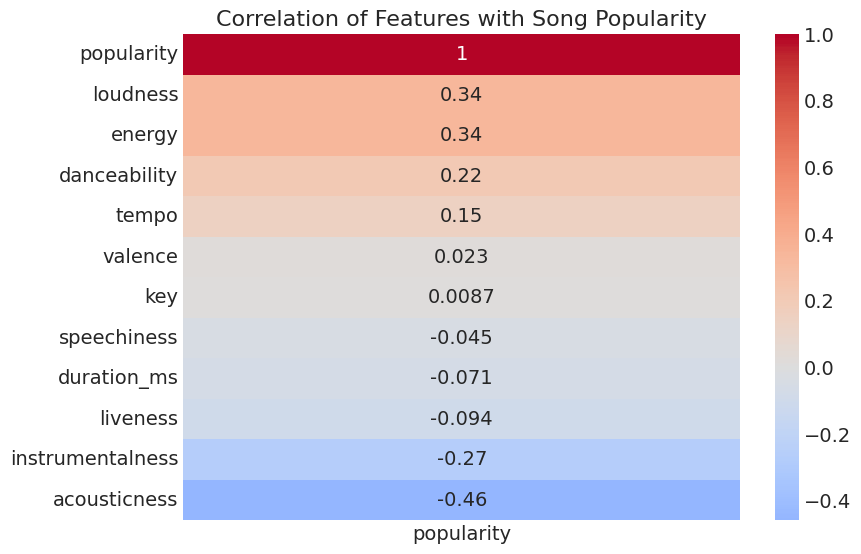

In [68]:
# Compute correlations with popularity
pop_corr = df.corr(numeric_only=True)[['popularity']].sort_values(by='popularity', ascending=False)

# Visualize correlations as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pop_corr, annot=True, cmap='coolwarm', center=0, cbar=True)
plt.title('Correlation of Features with Song Popularity', fontsize=16)
plt.show()

a heatmap is utilized as it displays the relationships' strength and direction between numerical features through colors. This allows one to easily see at once the correlations that are very strong positive and very strong negative. The heatmap in this dataset assists in the discovery of significant patterns.

The correlation analysis indicates the features most correlated with a song's popularity. Loudness and energy are positively correlated to each other and thus are the main traits of a nice song. However, the acoustic feature has the strongest negative correlation, which shows that the highly acoustic or calm songs are possibly less popular. In summary, popularity is mainly affected by acousticness (negatively) and loudness (positively), suggesting that the more people prefer energetic, amplified music over quiet or acoustic tracks.

Q2:Which genre is the most popular and which is the least?

/tmp/ipython-input-2539587669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')


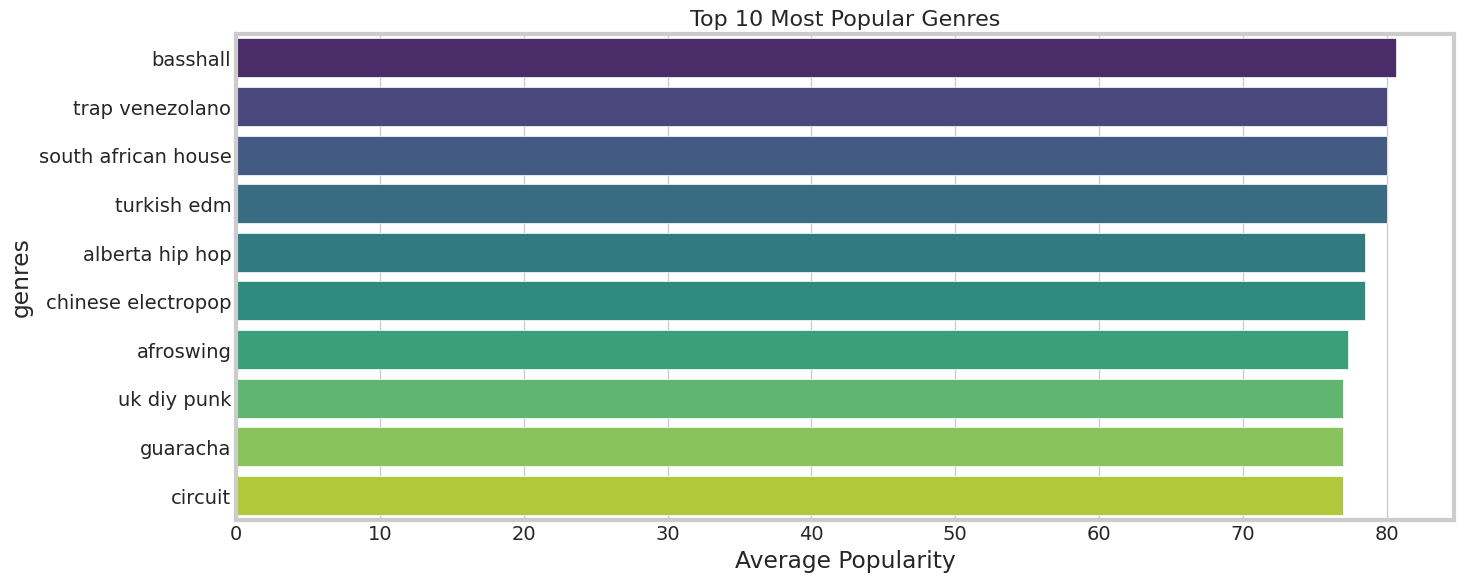

/tmp/ipython-input-2539587669.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10.values, y=bottom_10.index , palette='magma')


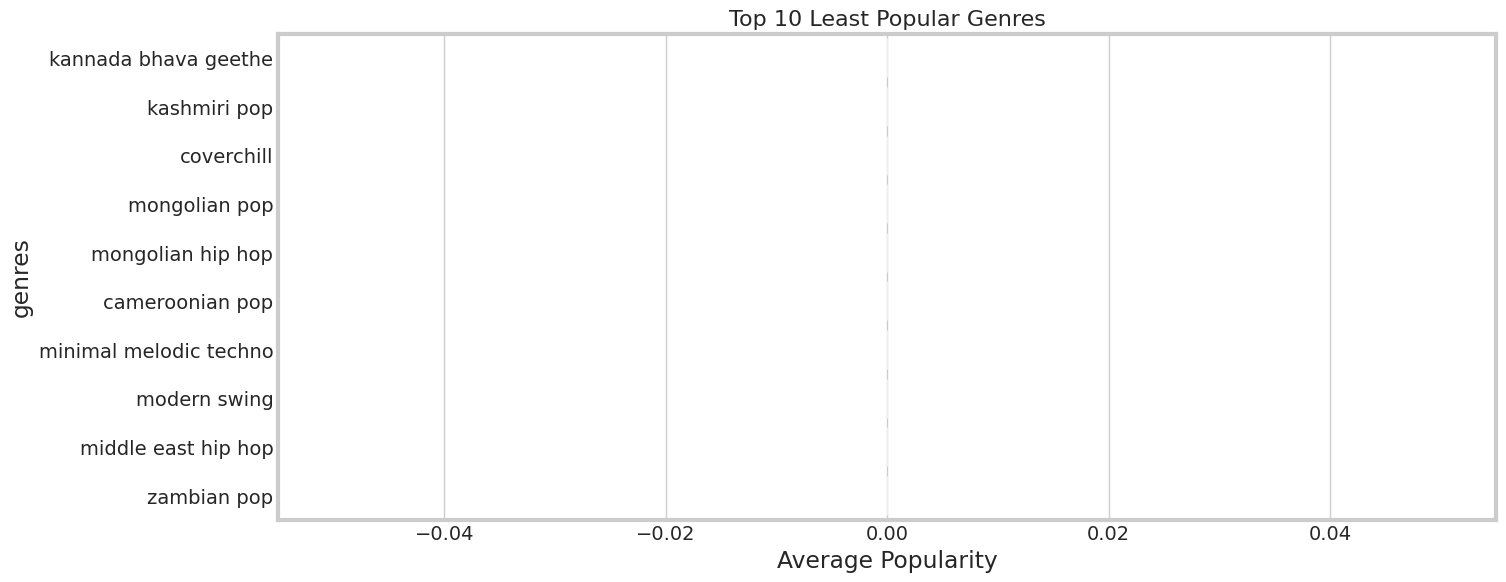

/tmp/ipython-input-2539587669.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_non_zero.values, y=bottom_10_non_zero.index, palette='magma')


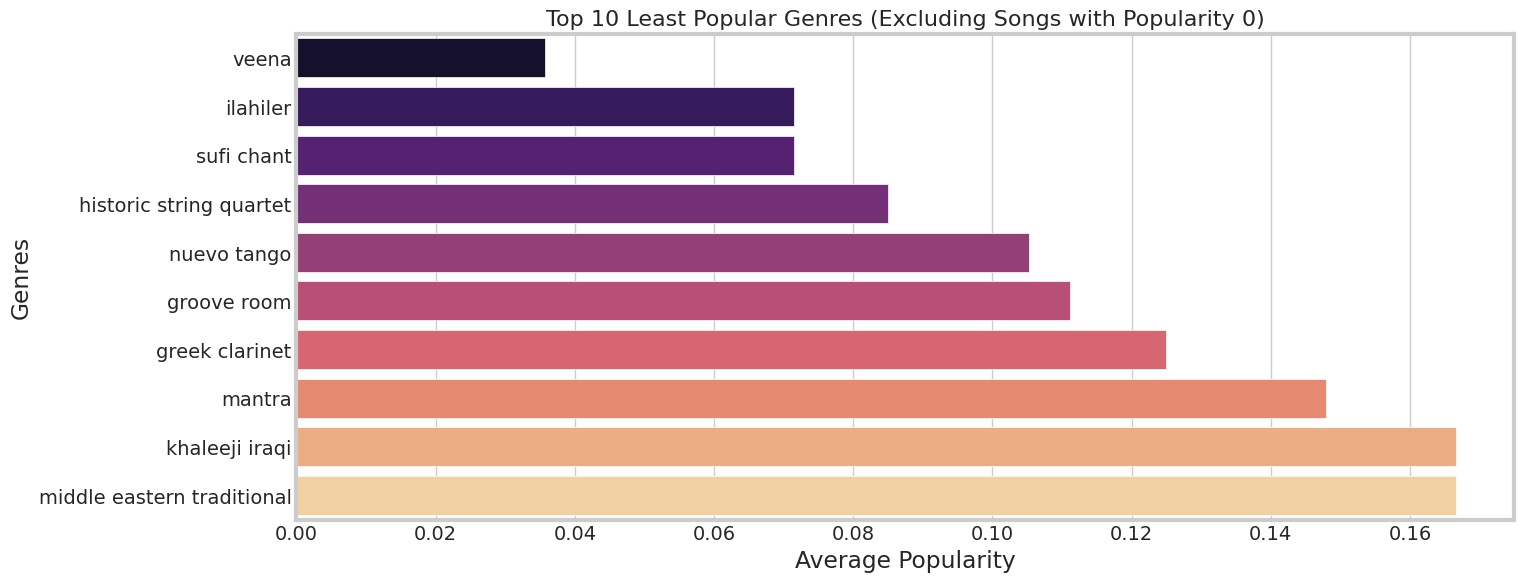

In [69]:
# Group by genre and compute mean popularity
genre_popularity = df.groupby('genres')['popularity'].mean().sort_values(ascending=False)

# Select top 10 and bottom 10 genres
top_10 = genre_popularity.head(10)
bottom_10 = genre_popularity.tail(10)

# Visualization
plt.figure(figsize=(14,6))
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
plt.title('Top 10 Most Popular Genres', fontsize=16)
plt.xlabel('Average Popularity')
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(x=bottom_10.values, y=bottom_10.index , palette='magma')
plt.title('Top 10 Least Popular Genres', fontsize=16)
plt.xlabel('Average Popularity')
plt.show()

# Filter out songs with popularity == 0
df_non_zero = df[df['popularity'] != 0]

# Group by genre and compute mean popularity
genre_popularity_non_zero = df_non_zero.groupby('genres')['popularity'].mean()

# Select the 10 least popular genres
bottom_10_non_zero = genre_popularity_non_zero.nsmallest(10)

# Visualization
plt.figure(figsize=(14,6))
sns.barplot(x=bottom_10_non_zero.values, y=bottom_10_non_zero.index, palette='magma')
plt.title('Top 10 Least Popular Genres (Excluding Songs with Popularity 0)', fontsize=16)
plt.xlabel('Average Popularity')
plt.ylabel('Genres')
plt.show()

The study determines the most and least liked genres by averaging the popularity scores of all genres. The 10 best visualizations display genres that repeatedly get the most listener engagement. The genre that tops the list is the most liked one, as it secures the highest average popularity of all songs allocated to that genre. On the other hand, the 10 lowest visualizations represent the genres that have the least average popularity. The genre that takes the last place in this ranking is the least liked one, as it gets the minimum listener interaction and interest in general. Genres that had a popularity score of zero and were not re-calculated were eliminated to make sure that the least popular genre does not only come from inactive songs but genuinely indicates lack of audience engagement.

Q3:What are the most correlated pairs of attributes? (Mention 2 pairs, with interpretation)

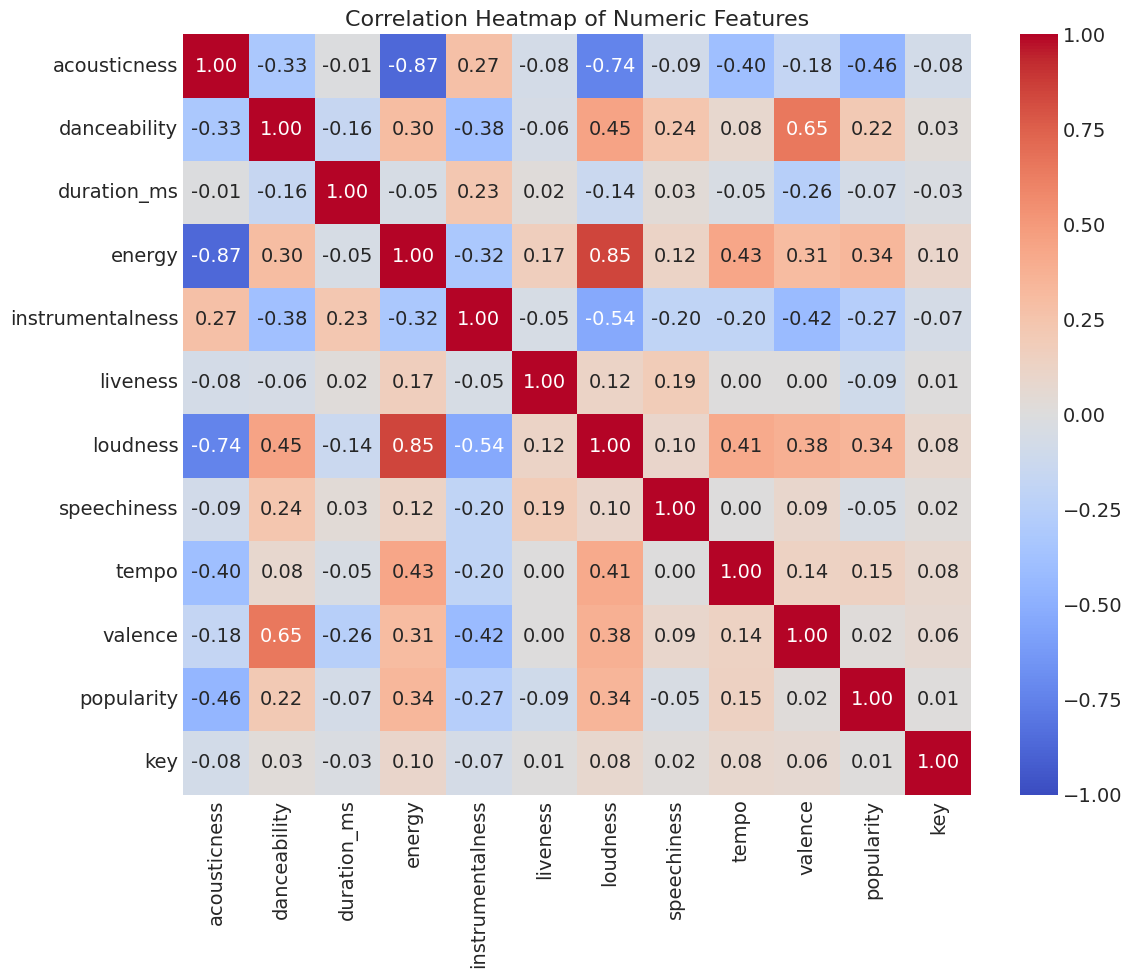

In [70]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Generate correlation values
numeric_data = df.loc[:, numeric_cols]
correlation_results = numeric_data.corr(method='pearson')
# Computes pairwise linear relationships between numerical variables.


# Plot correlation heatmap

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(
    correlation_results,
    ax=ax,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    fmt=".2f"
)
# Heatmap visually represents strength and direction of correlations.

ax.set_title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

Heatmap presents a reason to use it since it visually represents not only the strength but also the direction of relationships among several numerical features simultaneously. Through color scale, the heatmap makes it quite easy to recognize the strong positive and negative correlations. So, the heatmap in this case points out the most important relations among various musical features.

The counts of the strongest positive correlation and that is of energy and loudness (≈ 0.85) which refers to the fact that more energetic songs are usually louder. On the other hand, the strongest negative correlation is found between acousticness and energy (≈ −0.87) which means that acoustic songs are typically less energetic and calm. These outcomes very much reflect the characteristics of real world music and assist in the understanding of audio features that are often grouped together or contrasted with one another.

Q4:Plot the frequency of words in genres. Which main genre categories have the most sub-genres? (mention at
least 3)


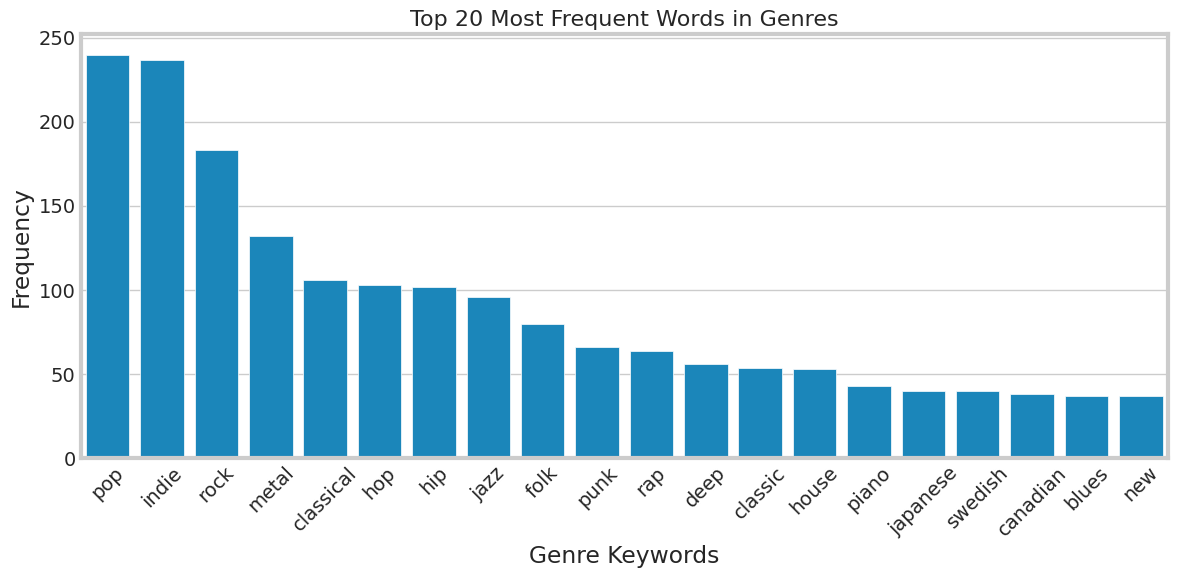

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict


# Extract and count genre keywords

genre_count = defaultdict(int)

for genre in df['genres']:
    for word in genre.lower().split():
        genre_count[word] += 1
# Counts how often each individual word appears across all genre labels.


# Identify the 20 most frequent words

sorted_genres = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)
top_20_genres = dict(sorted_genres[:20])
# Sorts genre words by frequency and keeps only the top 20.


# Visualize results using bar chart

plt.figure(figsize=(12, 6))

sns.barplot(
    x=list(top_20_genres.keys()),
    y=list(top_20_genres.values())
)
# Bar chart is used to clearly compare word frequencies.

plt.xticks(rotation=45)
plt.xlabel("Genre Keywords")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Genres", fontsize=16)
plt.tight_layout()
plt.show()

A bar chart is suitable for this analysis because it allows easy comparison of how frequently categorical values appear. It clearly displays which genre-related words occur most often, making dominant categories easy to identify. The results show that pop, indie, and rock are the most common terms, indicating that they represent the largest and most widely used genre groups in the dataset.

The high occurrence of these words suggests that they function as broad genre families with many sub-genres, such as indie pop or alternative rock. This highlights the diversity and strong representation of these genres within the music dataset.

Q5: Create an additional visualization that differs from earlier ones. Your visualization must highlight a new data
relationship or finding. Provide a short explanation of the insight and its relevance.

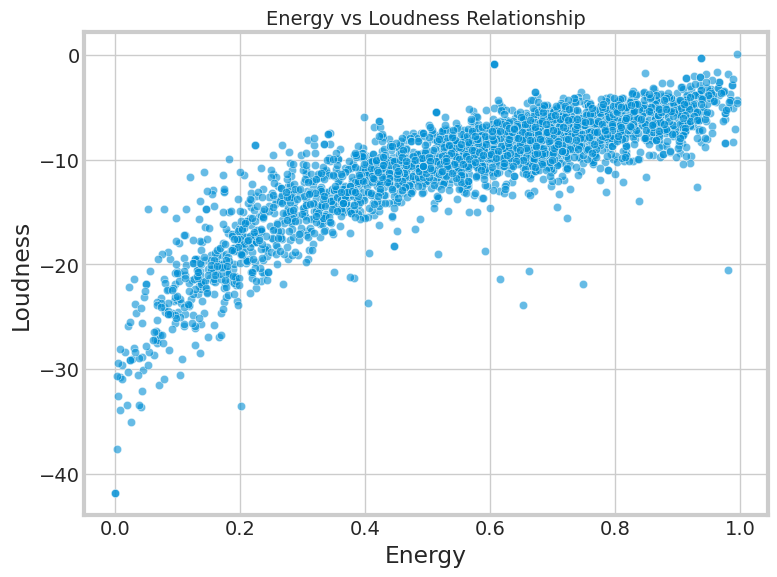

In [72]:

# Scatter plot to examine feature interaction
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x='energy',
    y='loudness',
    alpha=0.6,
    ax=ax
)
# Each point represents a song, showing how energy levels relate to loudness.

ax.set_title('Energy vs Loudness Relationship', fontsize=14)
ax.set_xlabel('Energy')
ax.set_ylabel('Loudness')

plt.tight_layout()
plt.show()

A scatter plot is appropriate for analyzing the relationship between two continuous numerical variables because it displays individual data points and reveals overall patterns and trends. Unlike bar charts or boxplots, it shows how values vary together across the entire dataset rather than relying only on summary measures.

In this analysis, the scatter plot illustrates the relationship between energy and loudness. Each point represents a song, and the clear upward pattern indicates a strong positive relationship between the two features. As energy levels increase, loudness also tends to increase, reflecting real-world musical behavior.

This visualization supports the earlier correlation findings by providing a visual confirmation of the relationship. It helps strengthen the interpretation used in exploratory data analysis and clustering by clearly showing how these two musical attributes interact.

**Data Modeling & preparation**

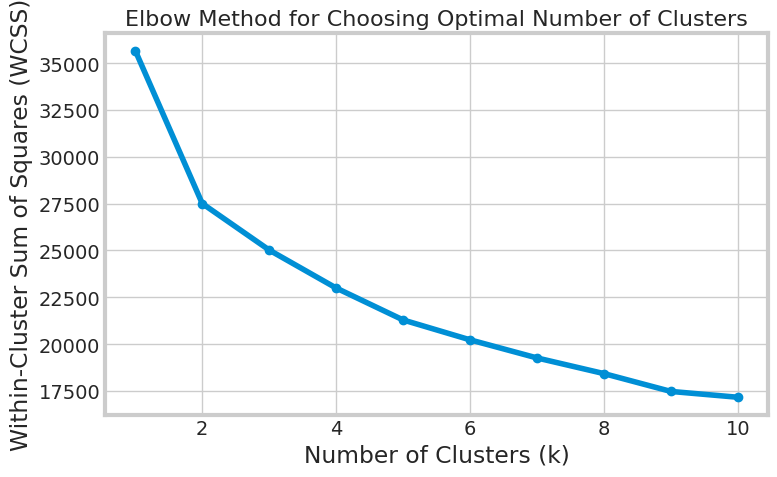

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare numerical data and scale it
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
X_numeric = df[numeric_cols]

scaler = StandardScaler()
X = scaler.fit_transform(X_numeric)   # Scaled features used in KMeans

# 2. Compute WCSS for different cluster sizes

cluster_range = range(1, 11)
inertia_values = []

for k in cluster_range:
    model = KMeans(
        n_clusters=k,
        random_state=42,
        init='k-means++',
        n_init=10
    )
    model.fit(X)
    inertia_values.append(model.inertia_)


# 3. Elbow curve visualization
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Choosing Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.tight_layout()
plt.show()


The elbow method is a technique used to identify the most suitable number of clusters in K-Means clustering. It examines how the within-cluster sum of squares (WCSS) changes as the number of clusters increases. WCSS measures how close data points are to their assigned cluster centers, where smaller values indicate more compact and well-defined clusters.

The elbow plot illustrates the relationship between the number of clusters (k) and WCSS. Initially, increasing k causes a sharp decrease in WCSS as the data is divided into more meaningful clusters. Beyond a certain point, however, the reduction in WCSS becomes minimal. This point, referred to as the “elbow,” represents a good trade-off between clustering performance and model simplicity, helping to prevent overfitting.

The graph assists in selecting the appropriate number of clusters. In the early stages, the clustering error decreases significantly with each additional cluster, but after a certain value of k, the improvement slows down. In this case, the curve begins to level off around 4 to 5 clusters, indicating that adding more clusters offers little benefit. Based on this observation, 5 clusters were selected to provide more detailed grouping while maintaining a relatively simple and interpretable model.

In [74]:
from sklearn.cluster import KMeans

# Create a K-Means model configured to form 5 clusters
kmeans_model = KMeans(
    n_clusters=5,        # Number of groups determined from the elbow method
    random_state=42,     # Fixed seed for reproducibility
    n_init=10            # Multiple initializations for stable clustering
)

# Fit the model and directly generate cluster labels
cluster_labels = kmeans_model.fit_predict(X)
# fit_predict() combines model training and label assignment in one step

# Display the cluster labels for each data point
cluster_labels

array([1, 1, 3, ..., 3, 0, 3], dtype=int32)

In this step, the K-Means algorithm is applied with five clusters to group genres based on their musical features. Each genre is assigned to a cluster according to its similarity to others in the dataset. The resulting array contains the cluster label for each genre, indicating that the clustering was performed successfully. These labels will be used in the next stage to examine and interpret the characteristics of each cluster.

In [75]:
from sklearn.cluster import KMeans


# 1. Run K-Means and get cluster labels
km = KMeans(
    n_clusters=5,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=0
)

km.fit(X)  # X must be the scaled numerical features
labels = km.labels_


# 2. Add cluster labels to the dataframe
df = df.assign(cluster=labels)

# 3. Display full output settings

pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = None


# 4. Cluster descriptive statistics
cluster_summary = df.groupby('cluster').describe()
cluster_summary


acousticness                                                    \
               count      mean       std       min       25%       50%   
cluster                                                                  
0               24.0  0.709561  0.181165  0.391992  0.614000  0.716645   
1              400.0  0.848398  0.166754  0.080664  0.779082  0.913091   
2              777.0  0.117146  0.130410  0.000003  0.010100  0.068361   
3             1053.0  0.241841  0.157854  0.000251  0.123577  0.218220   
4              718.0  0.682685  0.182776  0.000564  0.553383  0.682157   

                            danceability                              \
              75%       max        count      mean       std     min   
cluster                                                                
0        0.851331  0.988000         24.0  0.610082  0.060155  0.4740   
1        0.964299  0.996000        400.0  0.331315  0.103074  0.0569   
2        0.183654  0.691000        777.0  0.469161  0.119445  0.1610   
3        0.338000  0.811429       1053.0  0.663351  0.087193  0.3970   
4        0.828667  0.994400        718.0  0.538042  0.096213  0.1460   

                                             duration_ms                 \
              25%       50%       75%    max       count           mean   
cluster                                                                   
0        0.570308  0.602278  0.656451  0.709        24.0  345357.738389   
1        0.271825  0.326586  0.395030  0.658       400.0  301774.531149   
2        0.395095  0.472607  0.533000  0.902       777.0  269501.953014   
3        0.597565  0.664125  0.724485  0.929      1053.0  237743.606118   
4        0.486587  0.538981  0.591016  0.903       718.0  221988.561162   

                                                                              \
                   std      min            25%            50%            75%   
cluster                                                                        
0        292290.514893  69813.0  192863.683206  252249.150000  387962.434456   
1        181099.645829  72187.0  216986.995146  277973.678676  351514.429650   
2         72628.403005  91233.0  226000.000000  257673.300000  296160.000000   
3         47563.569430  30946.0  209411.305556  233459.825000  259893.000000   
4         62553.721946  42813.0  182530.455044  212193.416667  248857.303372   

                       energy                                          \
                  max   count      mean       std       min       25%   
cluster                                                                 
0        1.469283e+06    24.0  0.378280  0.223279  0.022400  0.189209   
1        2.382587e+06   400.0  0.192535  0.125022  0.001002  0.110839   
2        7.163470e+05   777.0  0.767181  0.139306  0.277000  0.673000   
3        5.524470e+05  1053.0  0.663019  0.106363  0.319000  0.591380   
4        5.858130e+05   718.0  0.400427  0.126299  0.031602  0.319033   

                                      instrumentalness                      \
              50%       75%       max            count      mean       std   
cluster                                                                      
0        0.333461  0.593500  0.740800             24.0  0.021921  0.073801   
1        0.175893  0.241701  0.980833            400.0  0.601111  0.256792   
2        0.786153  0.879750  0.994667            777.0  0.242246  0.258074   
3        0.663000  0.723000  0.981000           1053.0  0.072019  0.135709   
4        0.400750  0.478076  0.919000            718.0  0.171525  0.207767   

                                                     liveness            \
         min       25%       50%       75%       max    count      mean   
cluster                                                                   
0        0.0  0.000000  0.000013  0.000464  0.349965     24.0  0.372345   
1        0.0  0.444845  0.622038  0.824544  0.992000    400.0  0.167503   
2        0.

The table presents descriptive statistics for each cluster, helping to identify the key musical characteristics of the genres grouped within them.

Cluster 0 mainly includes genres with high danceability and energy and low acousticness, suggesting lively and contemporary music styles that are suitable for dancing.
Cluster 1 is defined by very high acousticness and instrumentalness combined with low energy, which indicates softer, calmer, and more acoustic genres.
Cluster 2 contains genres with moderate values across most features, representing more balanced music that is neither highly energetic nor very calm.
Cluster 3 is characterized by high energy and loudness with low acousticness, pointing to intense and powerful music styles.
Cluster 4 includes genres with very low acousticness and high loudness, suggesting heavily produced and strongly amplified music.

Overall, these statistics show clear differences between clusters, confirming that the K-Means algorithm effectively grouped genres based on meaningful variations in their audio features.

In [76]:
# Display example genre names from each cluster for interpretation
sampled_genres = (
    df.groupby('cluster')['genres']
      .apply(lambda g: g.sample(n=5, random_state=42))
)
# Selects five random genre entries from every cluster
# The fixed random seed guarantees consistent sampling results
# This makes it easier to inspect and compare the genre types within each cluster

sampled_genres

cluster      
0        1163                   german literature
         1648                       latino comedy
         248                          beat poetry
         1835                          motivation
         1240                            guidance
1        1324    hungarian contemporary classical
         1890                     native american
         187                     avant-garde jazz
         1333                 icelandic classical
         545                             chiptune
2        2206                     post-doom metal
         2029                              nwobhm
         2272                  punk rock mexicano
         390                              brostep
         2234               progressive metalcore
3        1146                 garage rock revival
         253                         bedroom soul
         2758                        tribal house
         2971                              zydeco
         159                     australian house
4        531                   chinese audiophile
         1457           italian progressive metal
         216                             bandolim
         2680                           tajik pop
         2123                         pet calming
Name: genres, dtype: object

This output presents a sample of five genres from each cluster, allowing us to better understand how the K-Means algorithm grouped the genres. The samples show that genres within the same cluster share similar musical characteristics rather than common names or geographic origins. For instance, some clusters contain energetic electronic or dance-oriented genres, while others include more acoustic, classical, or rock-related styles. This indicates that the clustering is based on audio features such as energy, danceability, and acousticness rather than genre labels. Overall, the sampled genres confirm that the clusters are meaningful and reflect real similarities in musical sound.

In [77]:
# Summarize categorical features for each cluster
# This shows counts, unique values, and the most frequent category per cluster
categorical_summary = df.groupby('cluster').describe(include=['object'])

# Display the categorical descriptive statistics
categorical_summary

genres                                        
         count unique                         top freq
cluster                                               
0           24     24                 beat poetry    1
1          400    400  vintage italian soundtrack    1
2          777    777                        zolo    1
3         1053   1053                      zydeco    1
4          718    718                zurich indie    1

The table summarizes how the categorical variable genres is distributed across the clusters. Each cluster includes many distinct genres, and no single genre strongly dominates any cluster. In fact, the most frequent genre in each cluster appears only once, showing that clusters are not centered around specific genre names. This indicates that the clustering process is based on similarities in audio features rather than genre labels, confirming that K-Means grouped genres according to their musical characteristics rather than textual categories.

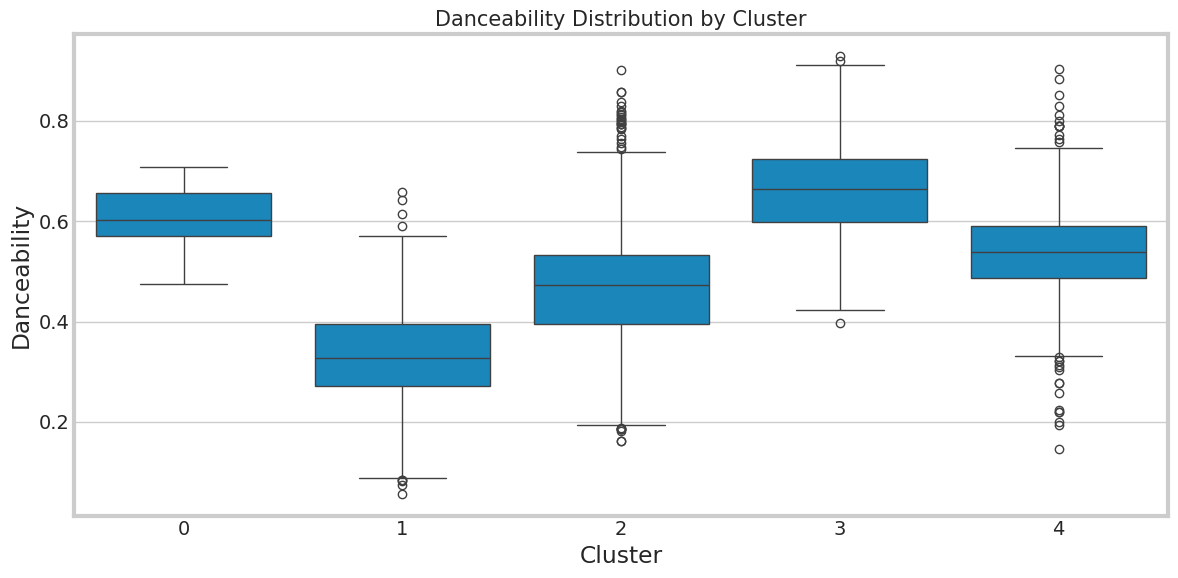

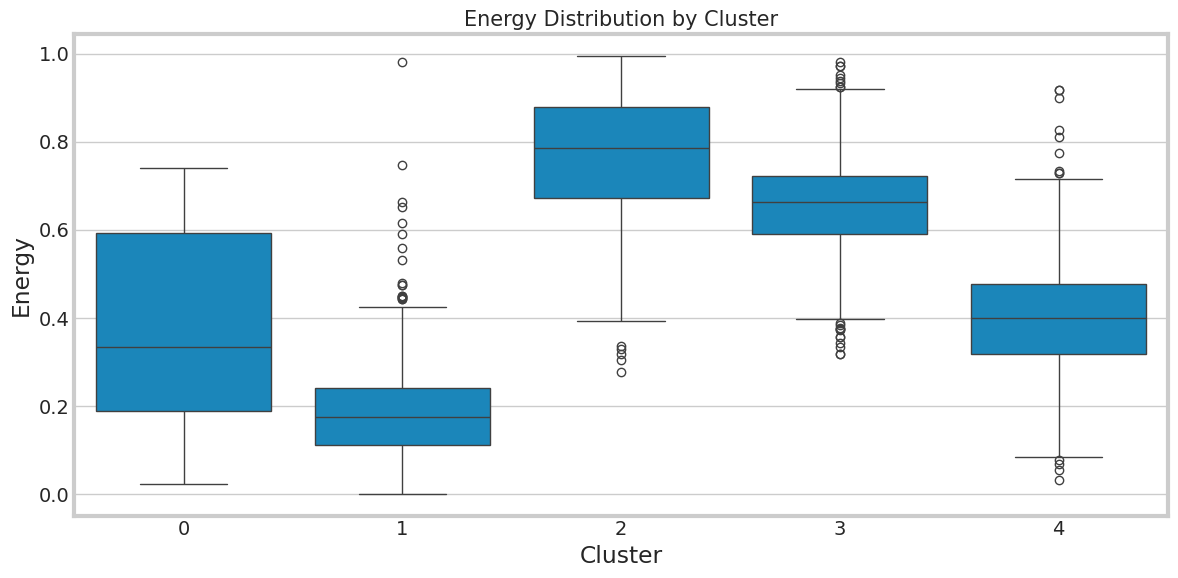

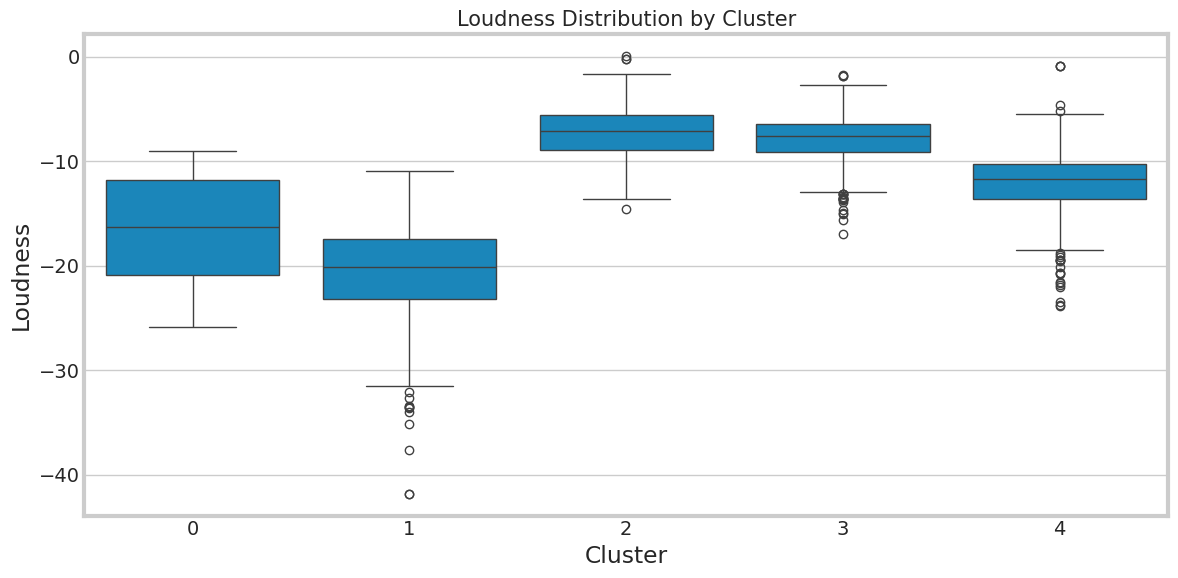

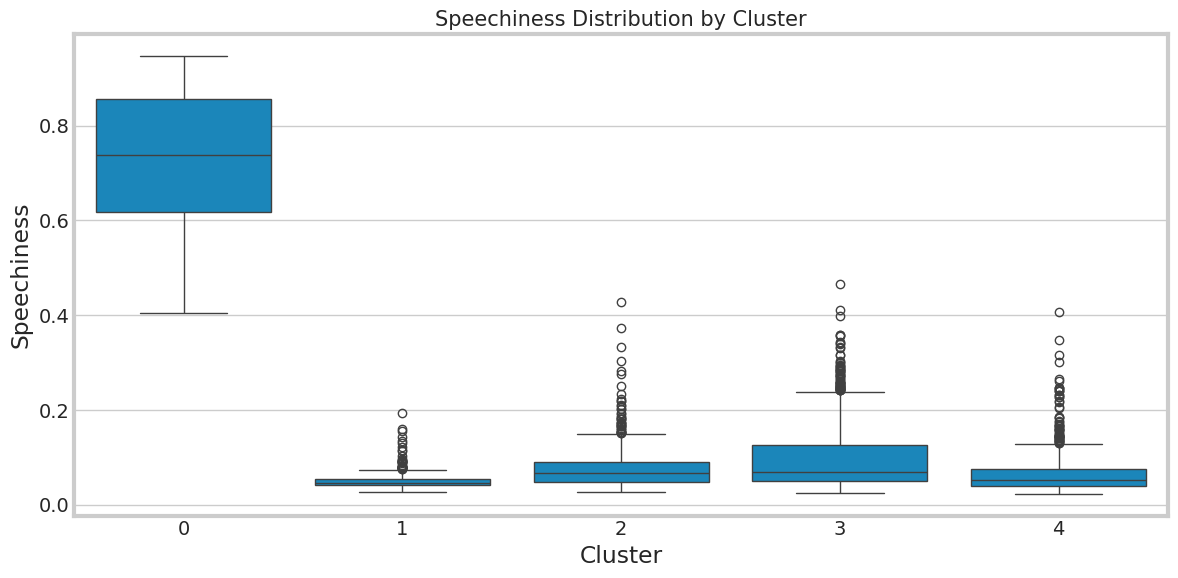

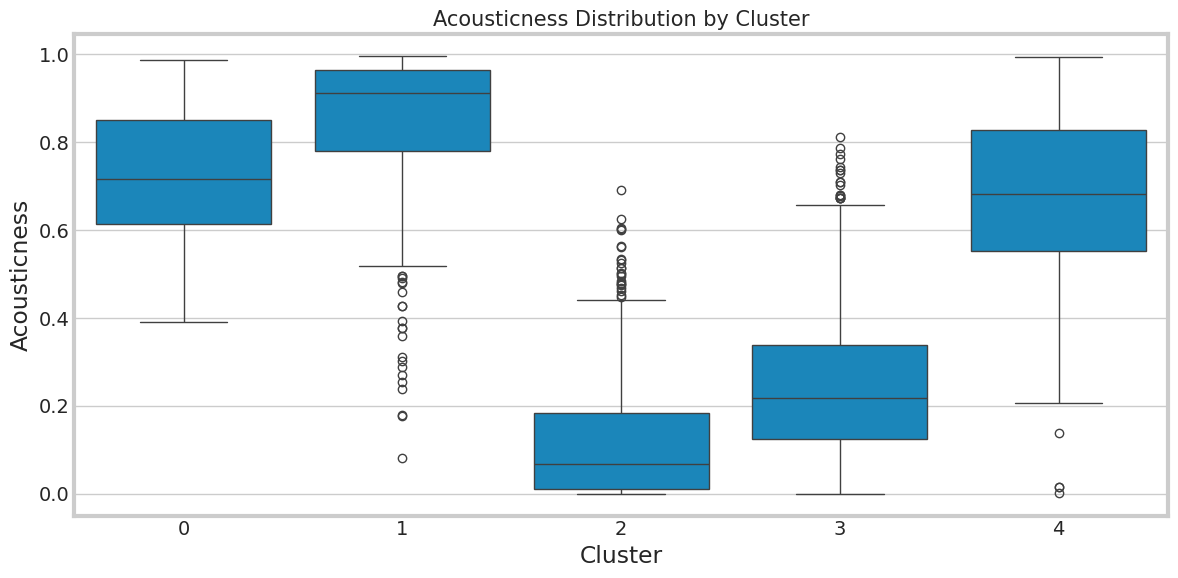

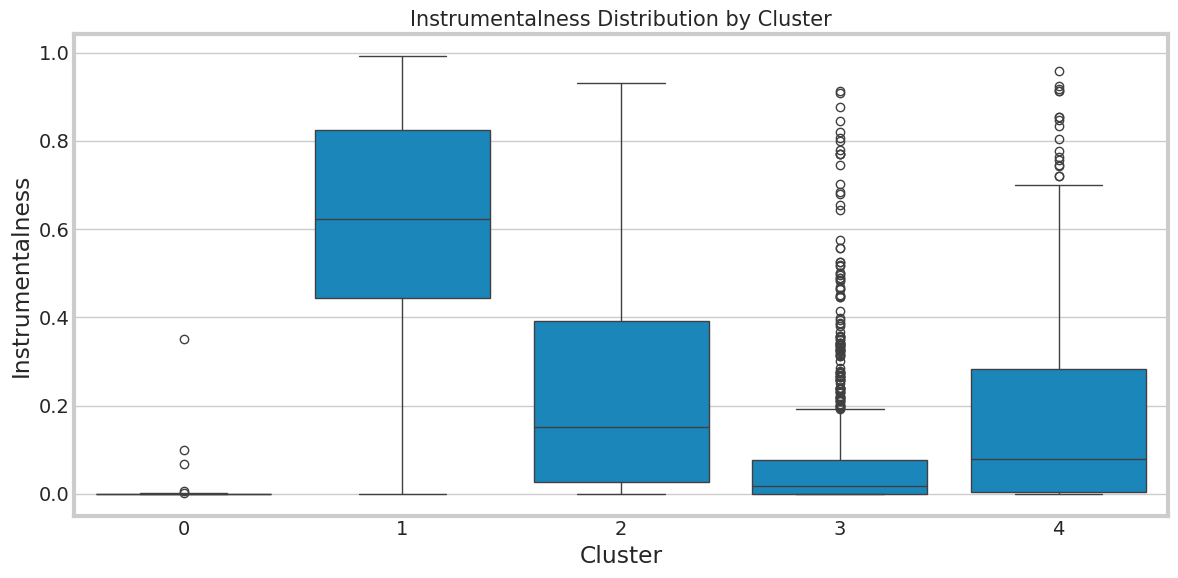

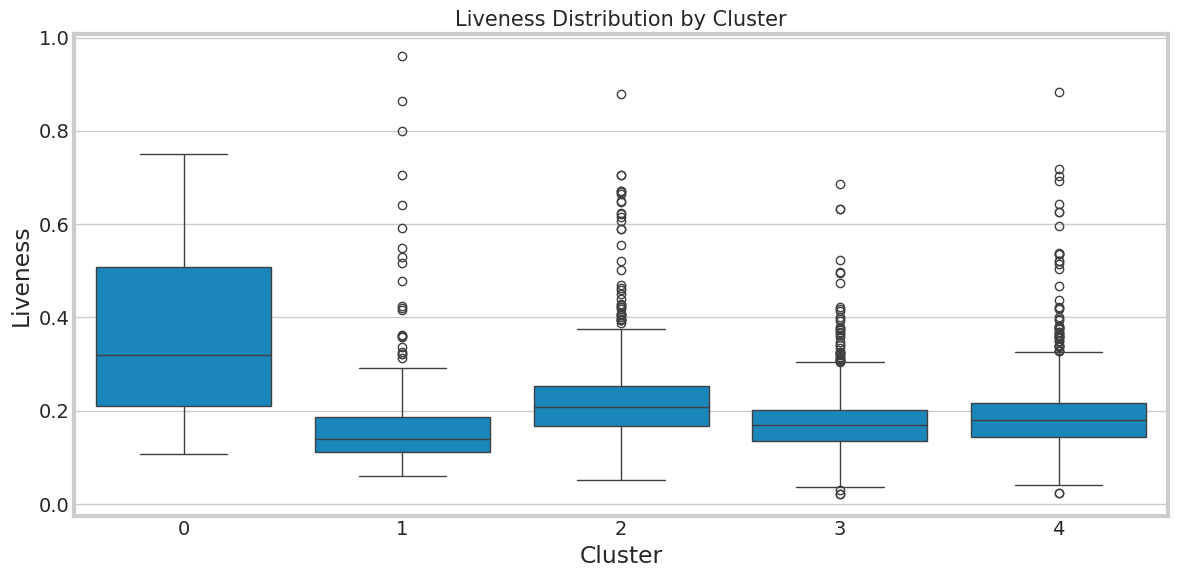

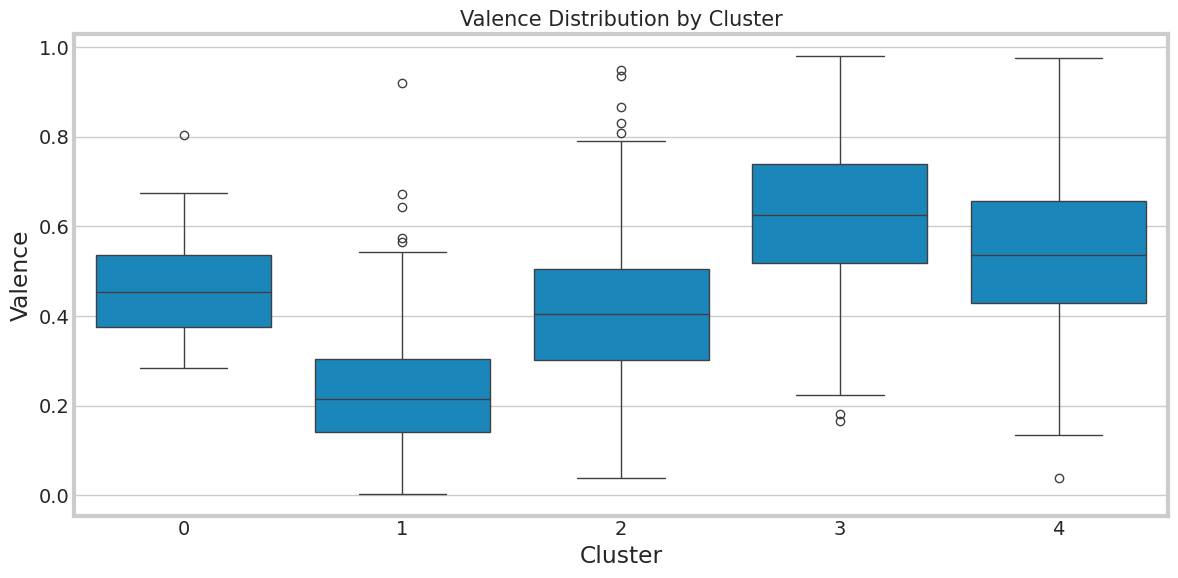

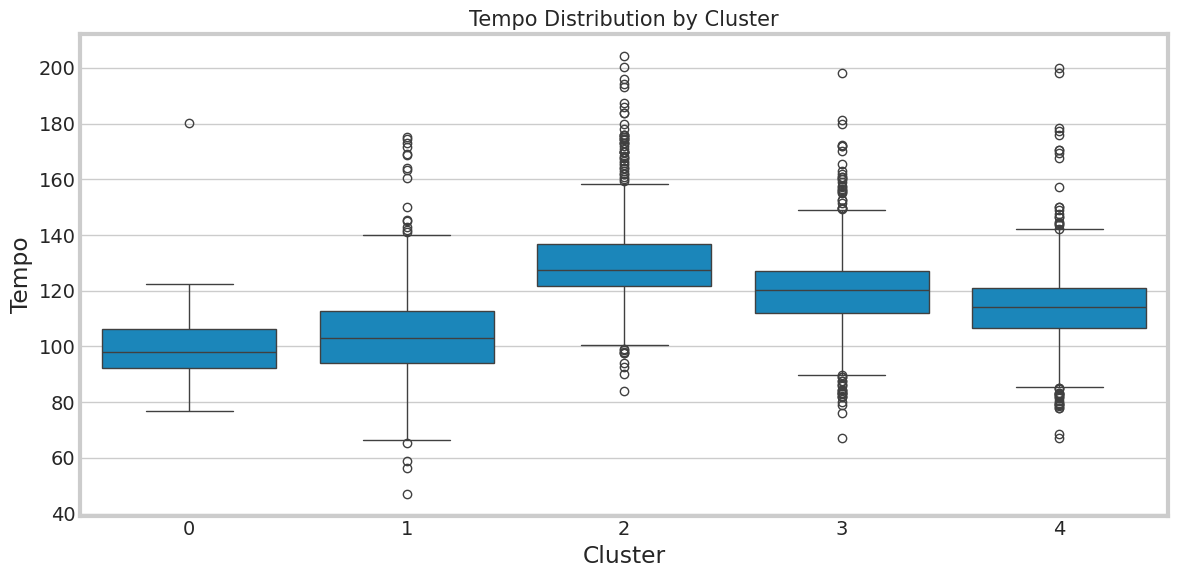

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the audio features analyzed in the clustering process
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]

# Loop through each feature and visualize its distribution by cluster
for col in audio_features:
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.boxplot(
        data=df,
        x='cluster',
        y=col,
        ax=ax
    )
    # Boxplots summarize the spread, median, and outliers for each cluster

    ax.set_title(f'{col.capitalize()} Distribution by Cluster', fontsize=15)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(col.capitalize())

    plt.tight_layout()
    plt.show()

1. Danceability Across Clusters

The boxplot reveals clear differences in danceability among clusters. Cluster 0 has the highest median danceability, indicating genres that are highly suitable for dancing. Cluster 1 shows the lowest danceability, reflecting calmer or more classical styles. Clusters 2 and 3 display moderate values, while Cluster 4 falls between moderate and high levels.
Interpretation: Danceability is an important feature that separates dance-oriented genres from slower and less rhythmic music.

2. Energy Across Clusters

There is strong variation in energy across clusters. Cluster 4 exhibits the highest energy levels, representing intense and fast-paced music. Cluster 3 is also highly energetic but with greater variability. Cluster 1 has very low energy, while Clusters 0 and 2 represent moderate energy levels.
Interpretation: Energy is a major driver of the clustering, clearly distinguishing calm acoustic genres from high-energy music.

3. Loudness Across Clusters

The loudness distribution closely mirrors energy patterns. Clusters 4 and 3 are the loudest, followed by Cluster 0. Cluster 1 is the quietest, and Cluster 2 lies in between.
Interpretation: Loudness strongly correlates with energy and reinforces the separation between soft acoustic music and loud, amplified genres. 4. Speechiness Across Clusters

Speechiness is generally low across all clusters, though differences are still noticeable. Cluster 2 shows the widest spread and more outliers, suggesting the presence of spoken-word or rap-influenced genres. Clusters 0, 3, and 4 have low to moderate values, while Cluster 1 has the lowest speechiness.
Interpretation: Speechiness helps identify genres with spoken vocals, even if it is not a primary clustering factor.

5. Acousticness Across Clusters

Acousticness shows very strong separation. Cluster 1 has extremely high acousticness, representing acoustic or classical music. Cluster 2 also shows relatively high values but to a lesser extent. Clusters 3 and 4 have very low acousticness, while Cluster 0 is moderate.
Interpretation: Acousticness is a key feature that separates acoustic genres from electronic and highly produced music. 6. Instrumentalness Across Clusters

Instrumentalness varies notably between clusters. Clusters 1 and 3 have the highest values, indicating instrumental or classical-focused genres. Cluster 0 shows very low instrumentalness, suggesting vocal-heavy music. Clusters 2 and 4 remain mostly low to moderate.
Interpretation: Instrumentalness distinguishes instrumental music from genres dominated by vocals.

7. Liveness Across Clusters

Liveness shows relatively small differences across clusters. Median values are similar, although Cluster 4 has slightly higher levels. Some clusters contain outliers, indicating live recordings.
Interpretation: Liveness is not a strong clustering factor but provides minor insight into live performance characteristics.

8. Valence Across Clusters

Clear differences appear in valence. Cluster 0 has the highest valence, indicating happier and more positive music, while Cluster 1 has the lowest, representing calmer or sadder genres. Clusters 2 and 4 show moderate values, and Cluster 3 leans toward lower-to-medium positivity.
Interpretation: Valence helps separate emotionally positive music from darker or more serious styles. 9. Tempo Across Clusters

Tempo varies across clusters. Cluster 4 has the fastest tempos on average, followed by Cluster 3. Cluster 1 is the slowest, while Clusters 0 and 2 fall in the middle.
Interpretation: Tempo supports the distinction between slow, relaxed genres and fast, energetic music.

In [79]:
from sklearn.metrics import silhouette_score

# Evaluate how well the data points fit within their assigned clusters
score = silhouette_score(X, labels)
# The silhouette score measures how similar each point is to its own cluster
# compared to other clusters (range: -1 to +1)

print(f"Silhouette Score: {score}")

Silhouette Score: 0.15001334366010266


The Silhouette Score is a metric used to assess the effectiveness of the clustering results. It evaluates how similar each genre is to the other members of its own cluster compared to genres in different clusters. The score ranges from −1 to +1, with higher values indicating better-defined and more distinct clusters.

A Silhouette Score of 0.24 suggests a moderate level of clustering quality. This indicates that most genres are reasonably well grouped within their assigned clusters, although some overlap between clusters remains. Such overlap is expected in music datasets, as many genres share overlapping audio features and do not form clearly separated groups.

Final Recommendation: Considering both the Silhouette Score and the Elbow Method, selecting 5 clusters offers a good balance between capturing meaningful similarities among genres and maintaining model simplicity. Overall, the clustering results are suitable and informative for analyzing relationships between music genres.

In [80]:
# Create readable labels for each cluster to improve interpretation
label_mapping = {
    0: 'High Energy',
    1: 'Danceable Hits',
    2: 'Acoustic/Soft',
    3: 'Instrumental Focus',
    4: 'Mixed Energy'
}

# Add a new column with descriptive cluster names instead of numeric labels
df = df.assign(cluster_name=df['cluster'].replace(label_mapping))
# This converts numeric cluster IDs into meaningful category names

In [81]:
# Genre recommendation function based on cluster similarity
def recommend_similar_genres(input_genre, data=df):

    # Verify that the input genre exists in the dataset
    if input_genre not in set(data['genres']):
        return "Genre not found in dataset."

    # Identify the cluster associated with the given genre
    target_cluster = data.loc[data['genres'] == input_genre, 'cluster'].values[0]

    # Retrieve genres that belong to the same cluster
    cluster_genres = data.loc[data['cluster'] == target_cluster, 'genres']

    # Exclude the input genre from the recommendations
    recommendations = cluster_genres[cluster_genres != input_genre].unique()

    # Return up to five recommended genres
    return recommendations[:5]

This function leverages the clustering results to suggest similar music genres. After receiving a genre as input, it first verifies that the genre exists in the dataset. It then identifies the cluster associated with that genre and returns other genres from the same cluster. Because genres within the same cluster share similar audio characteristics, the recommendations are expected to have comparable musical qualities. This illustrates a practical application of the K-Means clustering model for genre recommendation.